## Dataset

The dataset consists of six features or input variables:
Frequency: The frequency at which the noise measurements were taken (in Hertz).
Angle of Attack: The angle between the airfoil and the direction of the incoming flow (in degrees).
Chord Length: The chord length of the airfoil (in meters).
Free-stream Velocity: The velocity of the air approaching the airfoil (in meters per second).
Suction Side Displacement Thickness: The thickness of the airfoil at a certain location (in meters).
Scaled Sound Pressure Level: The output variable representing the sound pressure level (in decibels).

## Import Library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## DATA

In [2]:
df = pd.read_table('airfoil_self_noise.dat',sep='\t', 
                  names=["f","alpha","c","U_infinity","delta","SSPL"])
df.head(2)

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


## DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f           1503 non-null   int64  
 1   alpha       1503 non-null   float64
 2   c           1503 non-null   float64
 3   U_infinity  1503 non-null   float64
 4   delta       1503 non-null   float64
 5   SSPL        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [4]:
df.describe()

,f,alpha,c,U_infinity,delta,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [12]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64


## DATA VISUALIZATION

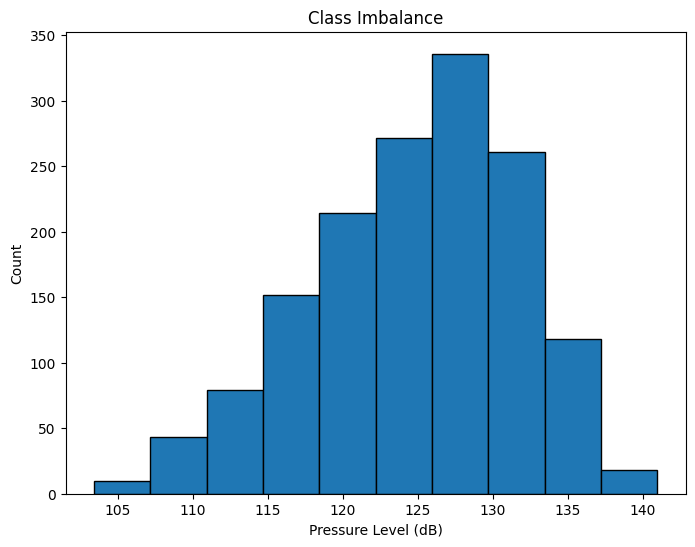

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(df["SSPL"], bins=10, edgecolor='black')
plt.xlabel("Pressure Level (dB)")
plt.ylabel("Count")
plt.title("Class Imbalance")
plt.show()

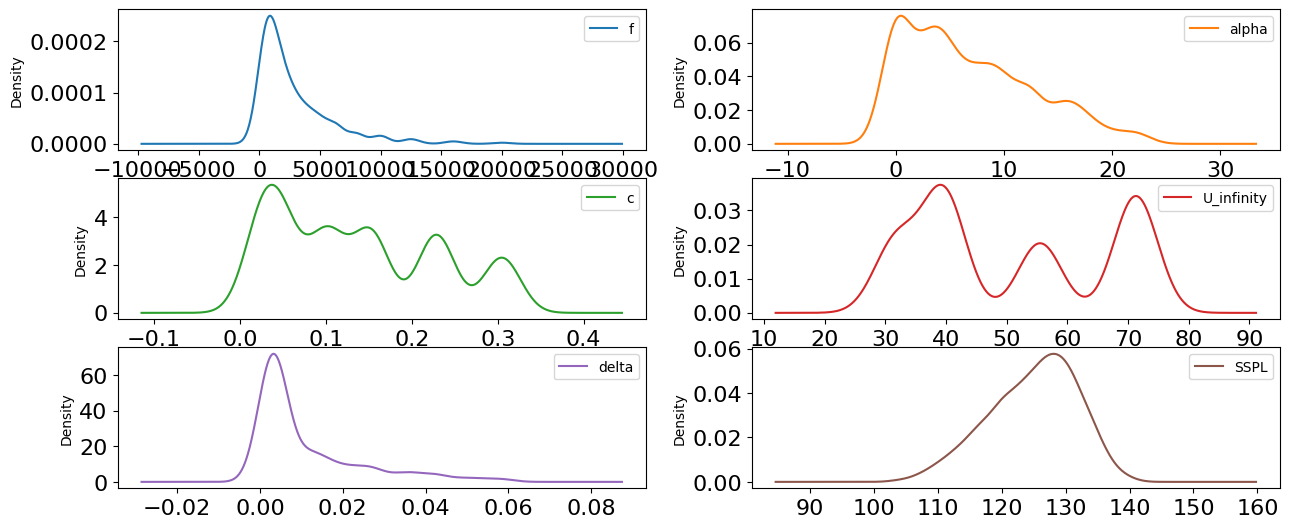

In [6]:
df.plot(kind='density',subplots=True,layout=(7,2),sharex=False,fontsize=16,figsize=(15,15))
plt.show()

### Can we identify any outliers in the dataset?

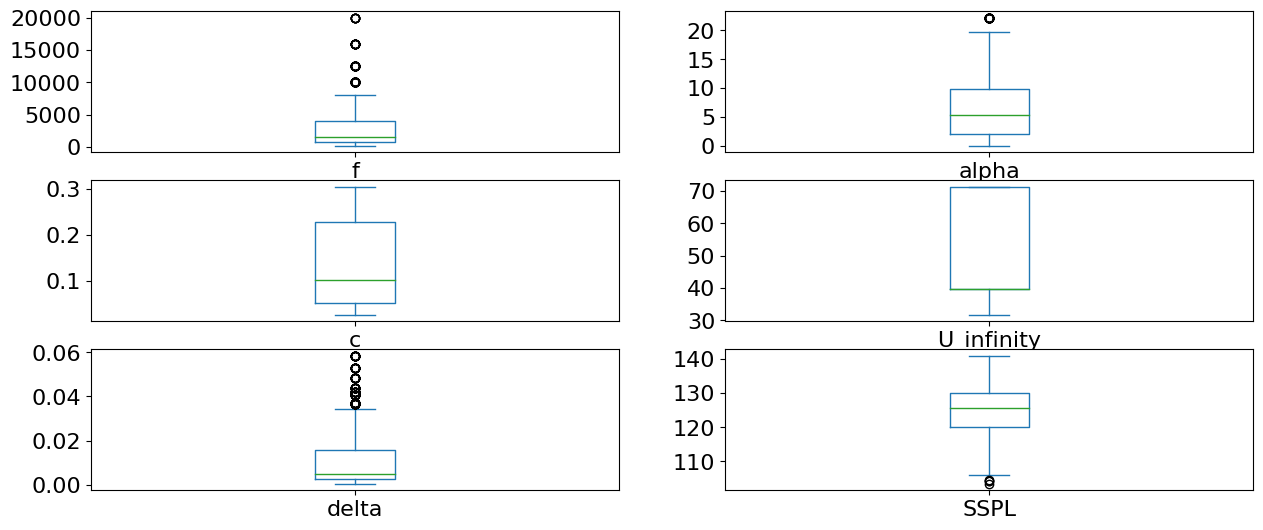

In [7]:
df.plot(kind='box',subplots=True,layout=(7,2),sharex=False,fontsize=16,figsize=(15,15))
plt.show()

### Are there any correlations between the features?

                   f     alpha         c  U_infinity     delta      SSPL
f           1.000000 -0.272765 -0.003661    0.133664 -0.230107 -0.390711
alpha      -0.272765  1.000000 -0.504868    0.058760  0.753394 -0.156108
c          -0.003661 -0.504868  1.000000    0.003787 -0.220842 -0.236162
U_infinity  0.133664  0.058760  0.003787    1.000000 -0.003974  0.125103
delta      -0.230107  0.753394 -0.220842   -0.003974  1.000000 -0.312670
SSPL       -0.390711 -0.156108 -0.236162    0.125103 -0.312670  1.000000


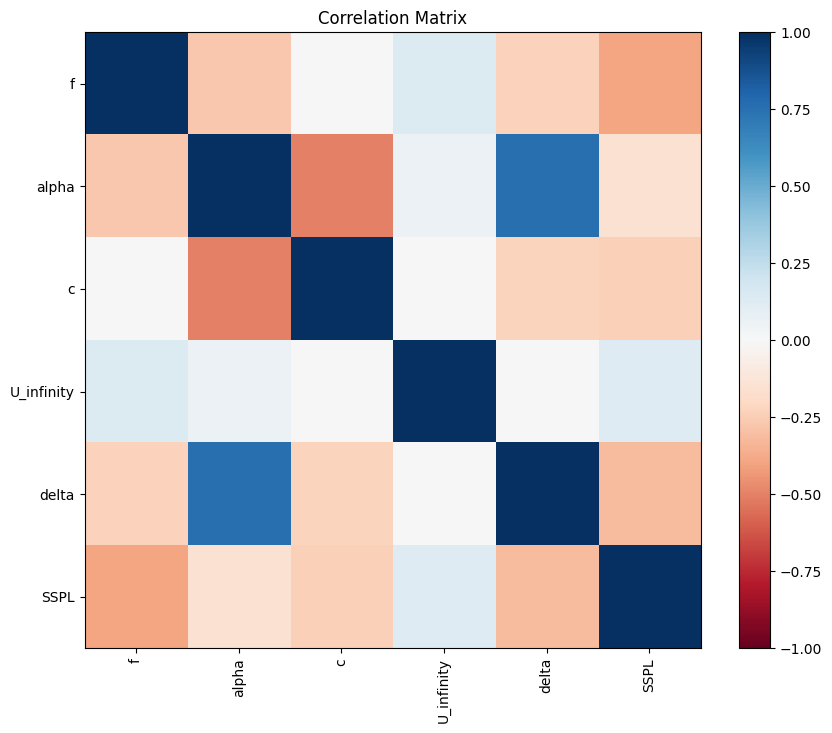

In [8]:
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(correlation_matrix, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar(heatmap)
plt.xticks(np.arange(len(df.columns)), df.columns, rotation='vertical')
plt.yticks(np.arange(len(df.columns)),df.columns)
plt.title('Correlation Matrix')

plt.show()

## DATA PREPROCESSING

Skewness is a statistical measure that quantifies the asymmetry of a probability distribution. It helps us understand the shape and symmetry of the data distribution. Skewness can be positive, negative, or zero.

In [11]:
features = df.drop('SSPL', axis=1)
skewness = features.skew()
print("Skewness:\n", skewness)
    

Skewness:
 f             2.137084
alpha         0.689164
c             0.457457
U_infinity    0.235852
delta         1.702165
dtype: float64


Since , our dataset do not have categorical variable , We will not be using Labelencoder or onehotencoding

## Train and Test Dataset Division

In [14]:
X = df.drop("SSPL",axis=1)
y = df["SSPL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Applying Standard Scaler

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building Models

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

R2 Score: 0.5582979754897286
Mean Squared Error: 22.128643318247274


In [19]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

R2 Score: 0.9342889735645517
Mean Squared Error: 3.2920289819322273


In [22]:
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

R2 Score: 0.8827077586744035
Mean Squared Error: 5.876174498338868


In [23]:
def model_rfe_linear(model,N,X,y):
    # RFE
    rfe = RFE(estimator=model, n_features_to_select=N)
    X_rfe = rfe.fit_transform(X,y)
    
    # Train_test Split
    X_train,X_test,y_train,y_test = train_test_split(X_rfe,y,shuffle=True,random_state=4)
    
    # Fitting the Linear regression model
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) # Predicting the value for test set
    
    # Performance Evaluation
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores = -scores
    
    print("-------------------------------------------------")
    print("******* RFE Feature Selection ********************")
    print('Number of selected functions:  ',rfe.n_features_)
    print('The mask of selected features: ',rfe.support_)
    print('The feature ranking:',rfe.ranking_)
    print('The external estimator:',rfe.estimator_)
    print("                     ")
    print()
    print("****** Cross Val Score *******")
    print('Mean score:', scores.mean())
    print('Standard deviation:', scores.std())
    print("                                            ")
    print()
    print("**********Evaluation***************")
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('MAE:', mae)
    print('R-squared:', r2)
    print("--------------------------------------------------")

